# Measures of Direct Selection.
First, we load the necessary packages.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
# Load the omega results into a Pandas dataframe.
omega_df = pd.read_csv('/Users/davidpeede/Dropbox/GitHub/santomea_natural_history/data/san_yak_omega_table.csv')
omega_df

,omega_san,omega_yak,yak_FB,mel_FB,CG,symbol,seqnames,start,end,length,type
0,0.000000,NaN,FBgn0229368,FBgn0034861,CG9815,CG9815,2R,23421521,23433354,11834,genome
1,0.200000,0.117647,FBgn0067106,FBgn0035132,CG17061,mthl10,3L,332801,342915,10115,genome
2,0.500000,0.000000,FBgn0067987,FBgn0025683,CG3164,CG3164,2L,122624,130791,8168,genome
3,NaN,0.000000,FBgn0068096,FBgn0000273,CG4379,Pka-C1,2L,9682315,9699297,16983,genome
4,NaN,0.000000,FBgn0228722,FBgn0082582,CG1539,tmod,3R,30532607,30578905,46299,genome
...,...,...,...,...,...,...,...,...,...,...,...
13029,0.000000,0.000000,FBgn0242241,FBgn0027784,CG6011,Prp18,3R,19029968,19031271,1304,genome
13030,0.000000,0.000000,FBgn0230974,FBgn0032833,CG10664,CoIV,2L,19958713,19960065,1353,genome
13031,0.285714,1.000000,FBgn0242242,FBgn0260779,CG6007,gatA,3R,19026174,19028857,2684,genome
13032,0.125000,0.153846,FBgn0230972,FBgn0263873,CG43720,sick,2L,19796365,19958424,162060,genome


In [7]:
# San specifc.
san_df = omega_df.dropna(subset=['omega_san'])
san_df

,omega_san,omega_yak,yak_FB,mel_FB,CG,symbol,seqnames,start,end,length,type
0,0.000000,NaN,FBgn0229368,FBgn0034861,CG9815,CG9815,2R,23421521,23433354,11834,genome
1,0.200000,0.117647,FBgn0067106,FBgn0035132,CG17061,mthl10,3L,332801,342915,10115,genome
2,0.500000,0.000000,FBgn0067987,FBgn0025683,CG3164,CG3164,2L,122624,130791,8168,genome
5,0.000000,0.000000,FBgn0228976,FBgn0031995,CG8475,CG8475,2L,8190808,8196918,6111,genome
8,0.125000,0.076923,FBgn0228723,FBgn0039787,CG9702,CG9702,3R,30579429,30582117,2689,genome
...,...,...,...,...,...,...,...,...,...,...,...
13029,0.000000,0.000000,FBgn0242241,FBgn0027784,CG6011,Prp18,3R,19029968,19031271,1304,genome
13030,0.000000,0.000000,FBgn0230974,FBgn0032833,CG10664,CoIV,2L,19958713,19960065,1353,genome
13031,0.285714,1.000000,FBgn0242242,FBgn0260779,CG6007,gatA,3R,19026174,19028857,2684,genome
13032,0.125000,0.153846,FBgn0230972,FBgn0263873,CG43720,sick,2L,19796365,19958424,162060,genome


In [8]:
# Yak specifc.
yak_df = omega_df.dropna(subset=['omega_yak'])
yak_df

,omega_san,omega_yak,yak_FB,mel_FB,CG,symbol,seqnames,start,end,length,type
1,0.200000,0.117647,FBgn0067106,FBgn0035132,CG17061,mthl10,3L,332801,342915,10115,genome
2,0.500000,0.000000,FBgn0067987,FBgn0025683,CG3164,CG3164,2L,122624,130791,8168,genome
3,NaN,0.000000,FBgn0068096,FBgn0000273,CG4379,Pka-C1,2L,9682315,9699297,16983,genome
4,NaN,0.000000,FBgn0228722,FBgn0082582,CG1539,tmod,3R,30532607,30578905,46299,genome
5,0.000000,0.000000,FBgn0228976,FBgn0031995,CG8475,CG8475,2L,8190808,8196918,6111,genome
...,...,...,...,...,...,...,...,...,...,...,...
13029,0.000000,0.000000,FBgn0242241,FBgn0027784,CG6011,Prp18,3R,19029968,19031271,1304,genome
13030,0.000000,0.000000,FBgn0230974,FBgn0032833,CG10664,CoIV,2L,19958713,19960065,1353,genome
13031,0.285714,1.000000,FBgn0242242,FBgn0260779,CG6007,gatA,3R,19026174,19028857,2684,genome
13032,0.125000,0.153846,FBgn0230972,FBgn0263873,CG43720,sick,2L,19796365,19958424,162060,genome


In [9]:
# Generate dictionaries.
san_dicc = {
    'obp': san_df[san_df['type'] == 'Obp']['omega_san'].values,
    'csp': san_df[san_df['type'] == 'Csp']['omega_san'].values,
    'gr': san_df[san_df['type'] == 'Gr']['omega_san'].values,
    'or': san_df[san_df['type'] == 'Or']['omega_san'].values,
    'genome': san_df[san_df['type'] == 'genome']['omega_san'].values,
}
san_genes = {
    'obp': san_df[san_df['type'] == 'Obp']['omega_san'].values,
    'csp': san_df[san_df['type'] == 'Csp']['omega_san'].values,
    'gr': san_df[san_df['type'] == 'Gr']['omega_san'].values,
    'or': san_df[san_df['type'] == 'Or']['omega_san'].values,
    'genome': san_df[san_df['type'] == 'genome']['omega_san'].values,
}
yak_dicc = {
    'obp': yak_df[yak_df['type'] == 'Obp']['omega_yak'].values,
    'csp': yak_df[yak_df['type'] == 'Csp']['omega_yak'].values,
    'gr': yak_df[yak_df['type'] == 'Gr']['omega_yak'].values,
    'or': yak_df[yak_df['type'] == 'Or']['omega_yak'].values,
    'genome': yak_df[yak_df['type'] == 'genome']['omega_yak'].values,
}

In [40]:
# Intialize a dictionary for the results.
summary_dicc = {
    'N (san)': [], 'N (yak)': [],
    'AVG (san)': [], 'AVG (yak)': [],
    'STD (san)': [], 'STD (yak)': [],
}
all_san = []
all_yak = []
# For every gene family.
for key in san_dicc.keys():
    # Fill the dictionary.
    summary_dicc['N (san)'].append(san_dicc[key].size)
    summary_dicc['AVG (san)'].append(np.mean(san_dicc[key]))
    summary_dicc['STD (san)'].append(np.std(san_dicc[key]))
    summary_dicc['N (yak)'].append(yak_dicc[key].size)
    summary_dicc['AVG (yak)'].append(np.mean(yak_dicc[key]))
    summary_dicc['STD (yak)'].append(np.std(yak_dicc[key]))
    # Fill the lists.
    all_san.append(np.where(san_dicc[key] == 0, 0, np.log10(san_dicc[key])))
    all_yak.append(np.where(yak_dicc[key] == 0, 0, np.log10(yak_dicc[key])))
# Compile the results.
summary_df = pd.DataFrame(data=summary_dicc, index=list(san_dicc.keys()))
summary_df

/tmp/ipykernel_53414/1147275408.py:19: RuntimeWarning: divide by zero encountered in log10
  all_san.append(np.where(san_dicc[key] == 0, 0, np.log10(san_dicc[key])))
/tmp/ipykernel_53414/1147275408.py:20: RuntimeWarning: divide by zero encountered in log10
  all_yak.append(np.where(yak_dicc[key] == 0, 0, np.log10(yak_dicc[key])))


,N (san),N (yak),AVG (san),AVG (yak),STD (san),STD (yak)
obp,44,52,1.468182,0.656181,1.620071,0.684651
csp,32,33,0.968378,1.086364,0.716796,1.329859
gr,56,62,1.172336,0.666162,1.240538,0.767650
or,56,60,1.092058,0.547574,1.199706,0.607700
genome,11016,11464,0.555485,0.404731,0.952915,0.647814


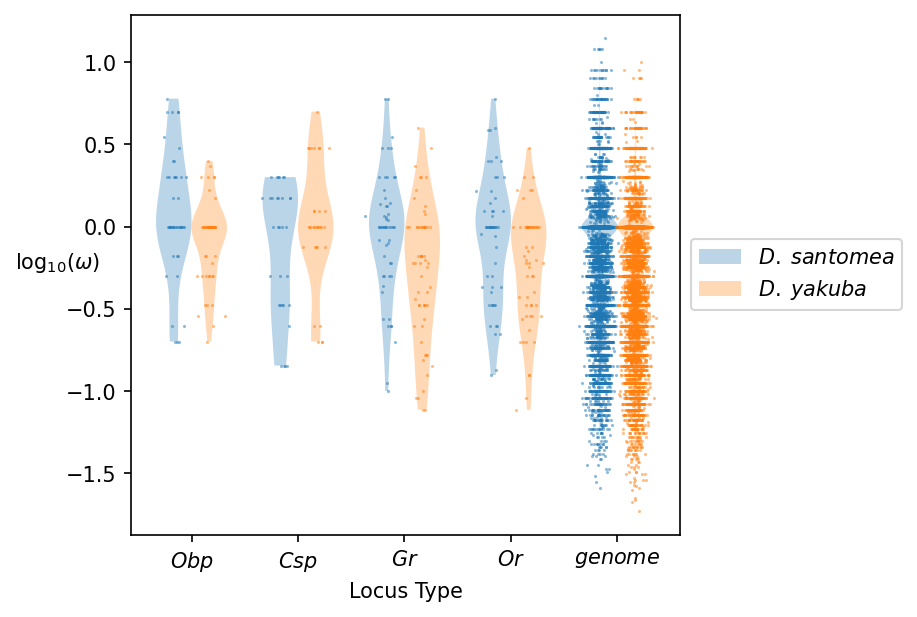

In [43]:
# Intialize list of x-axis tick labels.
all_x_ticks = [r'$Obp$', r'$Csp$', r'$Gr$', r'$Or$', r'$genome$']
# Set the center positions.
all_oirginal_pos = np.arange(0, 15, 3)
all_center_pos = (all_oirginal_pos + 0.5)
# Set the positions for the abba-baba results.
all_san_pos = all_oirginal_pos
# Set the positions for the baaa-abaa results.
all_yak_pos = (all_oirginal_pos + 1)
# Intialize the figure.
fig = plt.figure(figsize=(6, 4), constrained_layout=True, dpi=150.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot horizontal line at y = 01
#ax.axhline(y=1, color='black', linestyle='dashed', linewidth=1, label=r'$\omega = 1$')
# Plot the results for the abba-baba statistic.
all_san_plot = ax.violinplot(all_san, all_san_pos, vert=True, showextrema=False, widths=1, bw_method='scott')
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_san_pos:
    # Grab the simulate data points.
    y = all_san[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:blue', marker='.', s=1, alpha=0.5)
# Plot the results for the Danc statistics.
all_yak_plot = ax.violinplot(all_yak, all_yak_pos, vert=True, showextrema=False, widths=1, bw_method='scott')
# Set the index counter.
idx_counter = 0
# For every x-axis tick.
for i in all_yak_pos:
    # Grab the simulate data points.
    y = all_yak[idx_counter]
    # Move the index counter forward.
    idx_counter += 1
    # Add some jitter to the x-axis.
    x = np.random.normal(i, 0.15, size=len(y))
    # Plot the points!
    ax.scatter(x, y, color='tab:orange', marker='.', s=1, alpha=0.5)
# Make the legend.
ax.legend([all_san_plot['bodies'][0], all_yak_plot['bodies'][0]], [r'$D. \; santomea$', r'$D. \; yakuba$'], loc='center left', bbox_to_anchor=(1.0, 0.5))
# Set the axes labels.
plt.xlabel('Locus Type')
plt.ylabel(r'$\log_{10} (\omega)$', rotation=0)
# Set the x-axis tick positions and labels.
ax.set_xticks(all_center_pos)
ax.set_xticklabels(all_x_ticks)
# Show!
plt.show()

In [23]:
# Intialize a list of olfactory gene families.
gene_list = list(san_dicc.keys())[:-1]
# Intialize a dictionary to store the results.
fet_dicc = {
    'OR (san)': [], 'OR (yak)': [],
    'P-val (san)': [], 'P-val (yak)': [],
}
# For every olfcatory gene family...
for gene in gene_list:
    # Perform a fisher's exact test.
    san_or, san_pval = stats.fisher_exact(
        [
            [san_dicc[gene][san_dicc[gene] >= 1].size, san_dicc[gene].size],
            [san_dicc['genome'][san_dicc['genome'] >= 1].size, san_dicc['genome'].size]
        ]
    )
    yak_or, yak_pval = stats.fisher_exact(
        [
            [yak_dicc[gene][yak_dicc[gene] >= 1].size, yak_dicc[gene].size],
            [yak_dicc['genome'][yak_dicc['genome'] >= 1].size, yak_dicc['genome'].size]
        ]
    )
    # Fill the dictionary.
    fet_dicc['OR (san)'].append(san_or)
    fet_dicc['P-val (san)'].append(san_pval)
    fet_dicc['OR (yak)'].append(yak_or)
    fet_dicc['P-val (yak)'].append(yak_pval)
# Compile the results.
fet_df = pd.DataFrame(data=fet_dicc, index=gene_list)
fet_df

,OR (san),OR (yak),P-val (san),P-val (yak)
obp,2.547150,2.448062,0.000601,0.002833
csp,2.480818,2.571701,0.004061,0.009909
gr,2.418277,1.825078,0.000277,0.037894
or,2.168110,1.532305,0.001999,0.155970


In [38]:
all_san[0] == -inf

NameError: name 'inf' is not defined

In [37]:
san_dicc['obp']

array([0.        , 1.        , 2.        , 2.        , 1.        ,
       0.        , 2.        , 0.        , 3.5       , 0.        ,
       0.        , 5.        , 6.        , 0.        , 0.5       ,
       0.2       , 0.2       , 0.66666667, 0.66666667, 0.25      ,
       0.        , 1.        , 0.2       , 5.        , 5.        ,
       0.25      , 0.        , 2.        , 2.        , 0.        ,
       2.        , 2.        , 0.66666667, 2.5       , 2.5       ,
       1.5       , 1.        , 1.        , 1.        , 0.        ,
       1.5       , 5.        , 3.        , 0.5       ])